# Data Visualization in matplotlib

Today, we will begin our coverage of data visualization in Python, beginning with matplotlib, the foundationaal data visualization package for Python. In our next class, we will explore the data visualization functionality within the pandas and Seaborn packages, which are built on top of matplotlib.

Friendly Reminders:

* Homework #5 is due April 11 by 11:59 p.m.
* DataCamp Modules for matplotlib and customizing visualizations are due April 11 by 11:59 p.m.

In [1]:
%pylab inline
import pandas as pd
pd.set_option('colwidth', 200)

Populating the interactive namespace from numpy and matplotlib


## Best Practices for Data Visualization

Data visualization is a critical element of the data exploration process (descriptive statistics is another), but it's important to recognize that visualization has analytical value as well. So it's not just about seeing your data, but discovering meaningful insights about your data that may not stand out with your descriptive statistics. Here are some (hopefully) inspirational quotes about the value of data visualization:

> The drawing shows me at a glance what would be spread over ten pages in a book - Ivan Turgenev

> The greatest value of a picture is when it forces us to notice what we never expected to see - John Tukey

> Visualizations act as a campfire around which we gather to tell stories - Al Shalloway

A well-designed data visualization can be time consuming to produce, but it's worth it if it helps you communicate your analysis more effectively. Here are some characteristics of a good data visualization:

* Storytelling - What is it that you want your audience to understand about your visualization? For example, is there an overall trend that you want to highlight or a one vs. rest comparison? 
* Clarity - Use labels, annotations, encoding (e.g., color, shape, size, thickness), and/or scale (e.g., linear vs. log) to help emphasize your story.
* Efficiency - Each data visualization element should serve a purpose for communicating your story. If it doesn't support this purpose, you should remove it. Also, no 3-D or other decorative components!!

One of the most efficient ways to create visualizations is to copy from a template, and then adapt to your own needs. Each of our visualization packages offers plenty of documentation, with example code that you can use:

* [matplotlib Gallery](https://matplotlib.org/gallery/index.html)
* [pandas Visualization Documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

Here are some additional resources that you can explore for data visualization inspiration:

* [Storytelling with data](http://www.storytellingwithdata.com/)
* [FlowingData](https://flowingdata.com/)
* [Information is Beautiful](https://informationisbeautiful.net/)
* [WTF Visualizations](http://viz.wtf/)
* [Edward Tufte](https://www.edwardtufte.com/tufte/)
* [Center for Data Innovation](https://www.datainnovation.org/category/blog/data-visualization/)

### Improving Upon "Good Enough"

I always find it helpful to go through an exercise of evaluating existing visualizations and identifying opportunities for how to improve upon the visualization's ability to tell a clear story. Consider this evaluation and redesign (visual makeover) by Cole Nussbaumer Knaflic, data visualization and design expert.

![](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/t/578e6a29bebafbce484cd27c/1468951107681/?format=2500w)

![](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/t/578e7578579fb396b4ece195/1468954024710/?format=1500w)

### Types of Data Visualizations

There are a fundamental set of chart types that cover the significant majority of scenarios in which a data visualization is required:

* Scatter plot - Visualize relationship between two numerical variables (e.g., correlation, linear vs. nonlinear)
* Line chart (time series plot) - Visualize numerical data, most often as a function of time
* Histogram - Visualize distribution of numerical data, excellent for showing shape and frequency within bins
* Box-and-whister plot (boxplot) - Visualize distribution of numerical data, potentially across multiple categories
* Bar/Column chart - Compare aggregated numerical data across categories (e.g., GroupBy + Data Aggregation)

These may feel boring or uninteresting at times, but the advantage is that with practice, you will be able to create these visualizations quickly using matplotlib, pandas, and/or Seaborn. You will also have the ability to enhance these figures to make them more visually appealing and more effective in emphasizing your story. In addition, your audience will typically know how to interpret these visualizations easily, allowing them to focus on your story rather than trying to figure out how to interpret a more complex visualization.

Many of these chart types can be produced using functionality in each package, but in some cases, it will be more convenient to use one package over another. For example:

* Scatter plots are easier to produce in either matplotlib or pandas
* Time series plots are strightforward to produce in matplotlib and pandas
* Histograms and boxplots are easy to produce in all of the packages
* Bar/Column charts are easily generated from DataFrames in pandas or Seaborn

In addition to the fundamental chart types, you may find the next tier of visualizations to be useful as well:

* Geographic plots - Visualize aggregated numerical data across locations (e.g., countries, states, locales)
* Heat maps - Visualize numerical data across two dimensions of categories using color
* Dot/Strip/Rug/Event plots - Visualize distribution of numerical or event data, sometimes useful to combine with boxplots/histograms for additional detail

For all other chart types, think very carefully before using, as they are often misinterpreted (or not interpreted) by the audience.

## Introduction to matplotlib

matplotlib provides the foundational functionality for creating visualizations in Python. As suggested by its name, the workflow for designing visualizations in matplotlib is inspired by that from MATLAB. Therefore, it will appear to be the most tedious of our three visualization packages, but it also offers the most flexibility, which is required for more complex visualizations.

There are two interfaces within matplotlib for creating visualizations:

* An object-oriented interface, which uses Figure and Axes objects to create and modify the visualization
* A state-based based interface that is based on the MATLAB workflow (functional approach)

A general template for creating a visualization is as follows:

* Create figure
* Add subplots (if necessary)
* Create plot(s)
* Format and label axes and other figure components (if necessary)
* Add annotations (if necessary)
* Copy or save plot to file (if necessary)

An example of this process is provided at: https://matplotlib.org/tutorials/introductory/lifecycle.html

We will cover the basics of this workflow today, but these elements will also play a role in creating visualizations with pandas and Seaborn. For additional information about the matplotlib package, see https://matplotlib.org/index.html.

Let's begin by generating some synthetic data that we can use to practice data visualization:

In [2]:
n = 100
s = np.arange(n)
s[:5]

array([0, 1, 2, 3, 4])

In [3]:
x = np.random.randn(n)
x[:5]

array([-0.52199709,  1.81912362,  0.11951366,  1.86820445,  0.51451306])

In [4]:
y = np.random.randn(n)
y[:5]

array([ 0.26691017, -0.44069136, -1.50778146,  0.24202646,  2.37515735])

## Scatter Plots and Line Charts

The primary visualization function in matplotlib is plt.plot, which allows you to plot one or more series of data on a single plot (similar to Excel). This function facilitates the creation of both scatter plots and line charts. This function may appear to be fairly basic, but there are dozens of arguments that you can configure to tune your visualization, see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html (or plt.plot?) for additional details.

In [5]:
# plt.plot keyword arguments
pd.read_html('https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html', match='Property')[1]

,Property,Description
0,agg_filter,"a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array"
1,alpha,float
2,animated,bool
3,antialiased,bool
4,clip_box,Bbox
5,clip_on,bool
6,clip_path,"[(Path, Transform) | Patch | None]"
7,color,color
8,contains,callable
9,dash_capstyle,"{'butt', 'round', 'projecting'}"


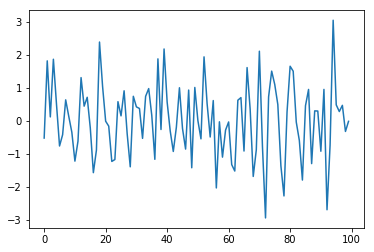

In [6]:
# Object-oriented approach
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s, x);

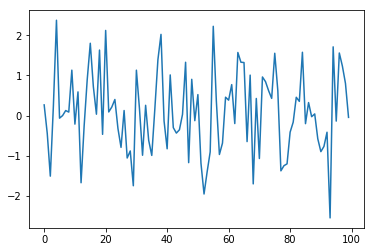

In [7]:
# State-based approach
plt.figure()
plt.plot(s, y);

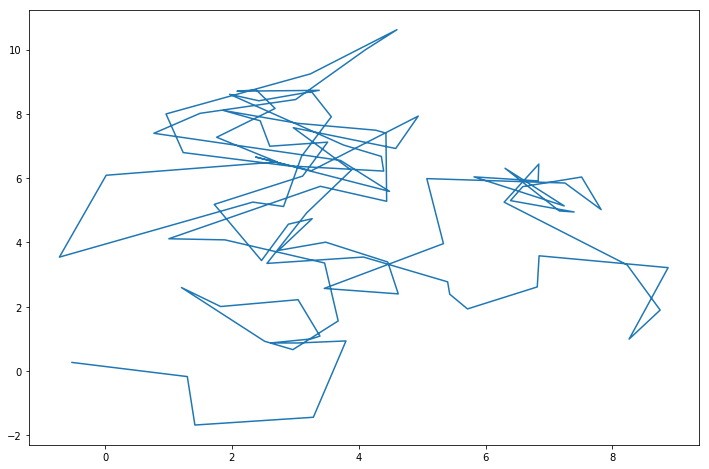

In [8]:
# Control figure size
plt.figure(figsize=(12,8))
plt.plot(x.cumsum(), y.cumsum());

The third argument for the plt.plot function is an optional format string (fmt), which is a convenient way of specifying any combination of color, marker, and linestyle for your plot (default is 'b-' which is a blue solid line). If you only specify a marker (and not a linestyle), this will generate a scatter plot; whereas if you specify a linestyle (with or without a marker), this will generate a line chart.

A format string consists of a component each for color, marker, and linestyle:
```python
fmt = '[color][marker][linestyle]'
```

These formats can also be passed as individual color (c), marker, or linestyle (ls) arguments.

In [9]:
# Colors - Also can specify grays as a floating point number between 0 and 1 (as string)
pd.read_html('https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html', match='blue')[0]

,character,color
0,'b',blue
1,'g',green
2,'r',red
3,'c',cyan
4,'m',magenta
5,'y',yellow
6,'k',black
7,'w',white


In [10]:
# Markers
pd.read_html('https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html', match='pixel')[0]

,character,description
0,'.',point marker
1,"','",pixel marker
2,'o',circle marker
3,'v',triangle_down marker
4,'^',triangle_up marker
5,'<',triangle_left marker
6,'>',triangle_right marker
7,'1',tri_down marker
8,'2',tri_up marker
9,'3',tri_left marker


In [11]:
# Linestyles
pd.read_html('https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html', match='dash-dot')[0]

,character,description
0,'-',solid line style
1,'--',dashed line style
2,'-.',dash-dot line style
3,':',dotted line style


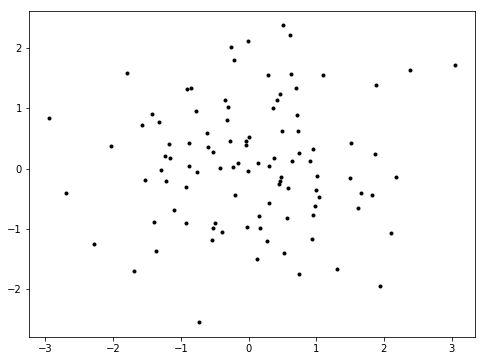

In [12]:
# Basic scatter plot with black points
plt.figure(figsize=(8,6))
plt.plot(x, y, 'k.');

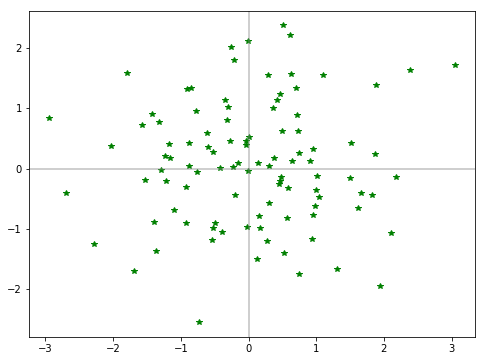

In [13]:
# Scatter plot with green circles and horizontal axis line
plt.figure(figsize=(8,6))
plt.plot(x, y, 'g*')
plt.axhline(0, c='0.5', alpha=0.5)
plt.axvline(0, c='0.5', alpha=0.5);

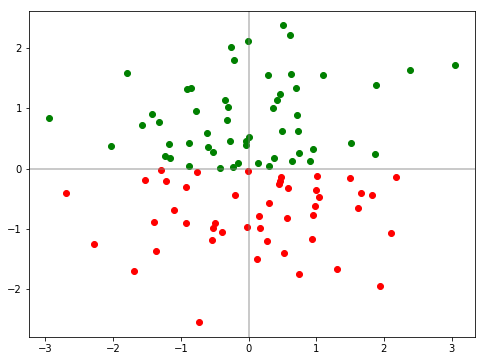

In [17]:
# Scatter plot with color encoding
negative = y < 0
plt.figure(figsize=(8,6))
plt.plot(x[negative], y[negative], 'ro')
plt.plot(x[~negative], y[~negative], 'go')
plt.axhline(0, c='0.5', alpha=0.55)
plt.axvline(0, c='0.5', alpha=0.55);

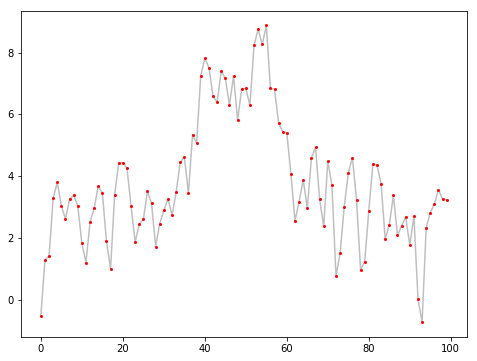

In [15]:
# Line chart with markers
plt.figure(figsize=(8,6))
plt.plot(s, x.cumsum(), '0.75')
plt.plot(s, x.cumsum(), 'r.', markersize=4, lw=0.5);

### Creating Subplots

In some cases, it will be more effective to overlay multiple series on the same plot. In other cases, multiple subplots are required. matplotlib offers two functions for creating subplots within a single figure:

* plt.subplot(*nrows*, *ncols*, *index*) - Updates current active figure
* plt.subplots(*nrows*, *ncols*, *sharex*, *sharey*) - Returns figure and list of axes objects that you can use to create the figure with the specified subplot layout and configuration

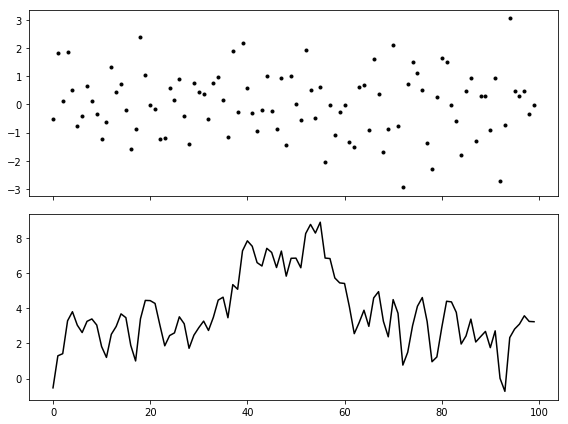

In [16]:
# plt.subplots - Object-oriented approach
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,6))
ax[0].plot(s, x, 'k.')
ax[1].plot(s, x.cumsum(), 'k-')
fig.tight_layout()

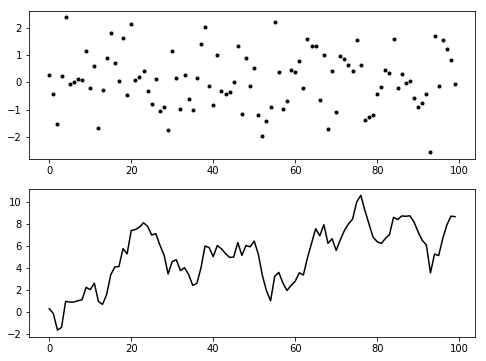

In [18]:
# plt.subplot - State-based approach
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(s, y, 'k.')
plt.subplot(2,1,2)
plt.plot(s, y.cumsum(), 'k-');

## Histograms and Boxplots

Basic histograms and boxplots are easy to produce in matplotlib, but there are many options (similar to plt.plot) for customizing the visualizations.

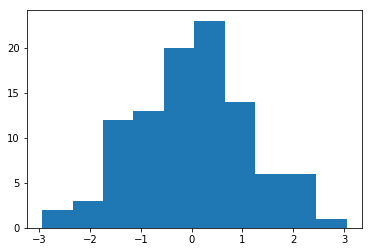

In [19]:
# Histogram
plt.hist(x);

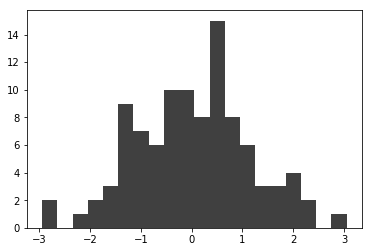

In [20]:
# Histogram - Specify number of bins and color
plt.hist(x, bins=20, color='0.25');

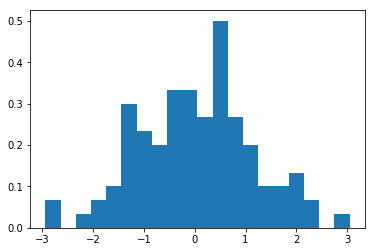

In [21]:
# Histogram - Specify number of bins
plt.hist(x, bins=20, density=True);

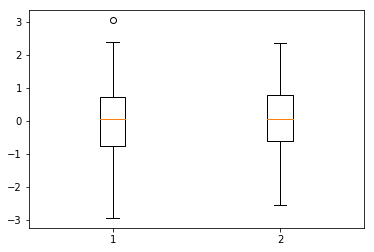

In [22]:
# Boxplot - Vertical (default)
plt.boxplot([x,y]);

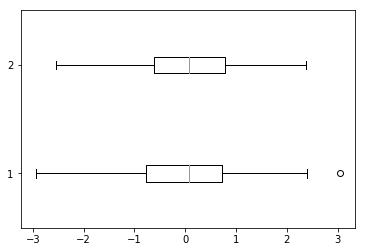

In [23]:
# Boxplot - Horizontal
plt.boxplot([x,y], vert=False);

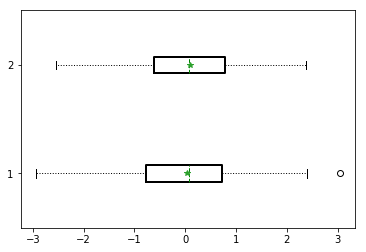

In [24]:
# Boxplot - Customize elements
plt.boxplot([x,y], vert=False, showmeans=True,
            medianprops={'color':'g', 'linestyle':'--'}, meanprops={'marker':'*'},
            boxprops={'linewidth':2}, whiskerprops={'linestyle':':'});

## Bar/Column Charts

Similar to the other chart types, they are highly customizable. Bar charts are technically horizontally oriented, and are generated via the plt.barh function. Column charts are vertically oriented, and are generated via the plt.bar function.

In [25]:
grades = ['A','B','C','D','F']
props = [0.2, 0.4, 0.25, 0.1, 0.05]

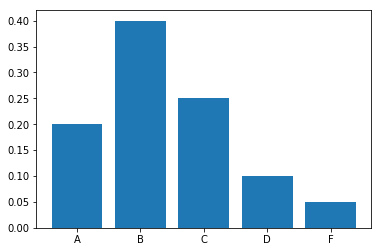

In [26]:
# Basic column chart
plt.bar(x=grades, height=props);

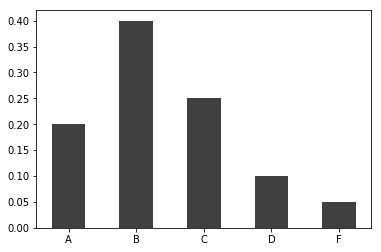

In [27]:
# Column chart - Adjust column width and color
plt.bar(x=grades, height=props, width=0.5, color='0.25');

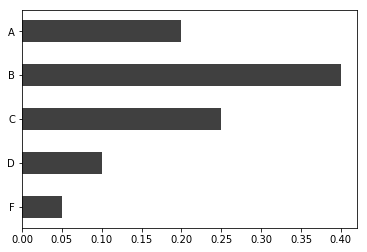

In [28]:
# Bar chart
plt.barh(y=grades[::-1], width=props[::-1], height=0.5, color='0.25');

## Formatting, Labeling, and Annotating Figures

Once you generate the desired plot(s), there are a substantial number of functions available to help you fine tune your visualization (all plt functions):

* Formatting options
    - xlim/ylim: Set x- and y-axis limits
    - xticks/yticks: Specify x- and y-axis tick values and labels
    - xscale/yscale: Specify x- and y-axis scales (e.g., linear, log)
    - grid: Enable/disable gridlines
    - tight_layout: Adjust subplot spacing
* Labeling options
    - xlabel/ylabel: Label x- and y-axis
    - title/suptitle: Add title to plot/figure
    - legend: Add legend to figure
* Annotation options
    - text: Add text to plot
    - annotate: Add text to plot with arrows pointing to the area of reference

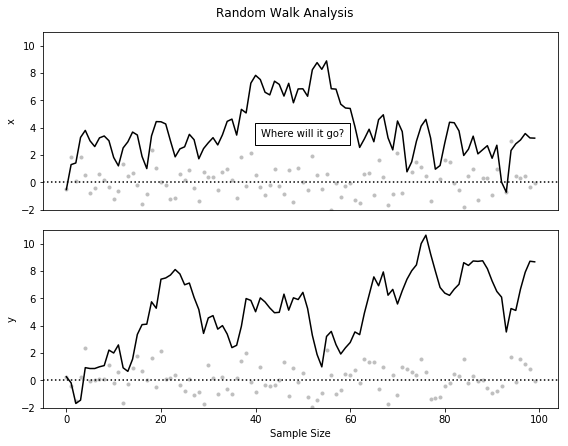

In [29]:
# Formatting, labeling, and annotating figure with subplots
min_val = np.min([x.cumsum(), y.cumsum()])
max_val = np.max([x.cumsum(), y.cumsum()])

plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(s, x, '0.75', marker='.', linestyle='')
plt.plot(s, x.cumsum(), 'k-')
plt.axhline(0, color='k', linestyle=':')
plt.grid(b=False, axis='y')
plt.xticks([])
plt.ylim([np.floor(min_val), np.ceil(max_val)])
plt.ylabel('x')
plt.title('')

plt.text(x=50, y=min_val+5, s='Where will it go?', horizontalalignment='center', 
        bbox={'linestyle': '-', 'facecolor': 'w', 'pad': 6})

plt.subplot(2,1,2)
plt.plot(s, y, '0.75', marker='.', linestyle='')
plt.plot(s, y.cumsum(), 'k-')
plt.axhline(0, color='k', linestyle=':')
plt.ylim([np.floor(min_val), np.ceil(max_val)])
plt.grid(b=False, axis='y')
plt.xlabel('Sample Size')
plt.ylabel('y')

plt.suptitle('Random Walk Analysis', y=1.025)

plt.tight_layout()

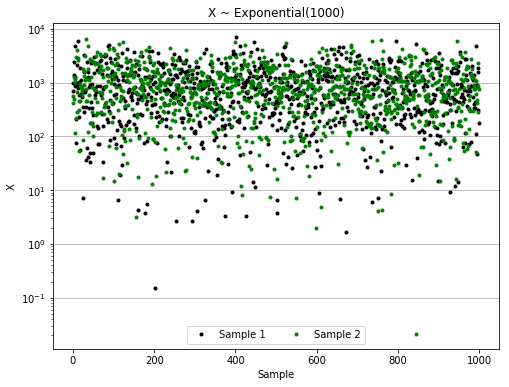

In [30]:
# Formatting with scale and legends
m = 1000
plt.figure(figsize=(8,6))
plt.plot(np.arange(m), np.random.exponential(scale=1000, size=m), 'k.');
plt.plot(np.arange(m), np.random.exponential(scale=1000, size=m), 'g.');
plt.grid(b=True, axis='y')
plt.yscale('log', basey=10);
plt.xlabel('Sample')
plt.ylabel('X')
plt.title('X ~ Exponential(1000)')
plt.legend(('Sample 1', 'Sample 2'), loc='lower center', ncol=2, frameon=True, facecolor='white');

In [ ]:
# Boxplot - Vertical (default)
plt.figure()
plt.boxplot([x,y]);
plt.xticks([1,2], ['x','y']);

## Styling Figures

matplotlib used to be lacking in terms of aesthetics, which took a lot of effort to style to create more visually appealling designs. Now, matplotlib (perhaps inspired by pandas and Seaborn) offers some easy-to-use functionality for styling figures.

In [31]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


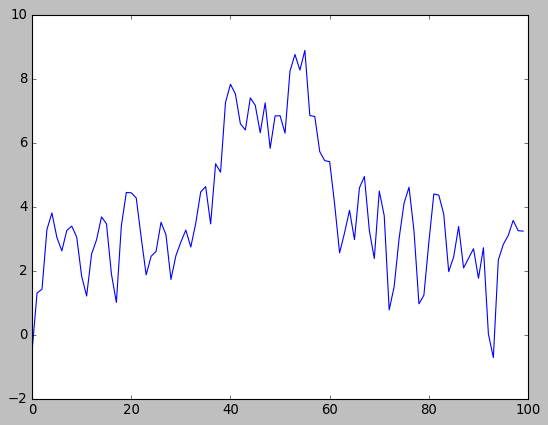

In [32]:
# Temporary styling - We've come a long way...
with plt.style.context('classic'):
    plt.figure()
    plt.plot(np.arange(n), x.cumsum())

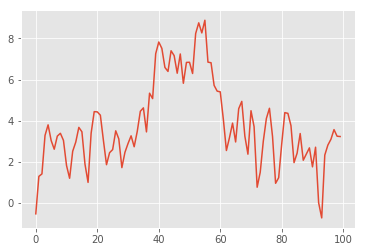

In [33]:
# Set style
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(n), x.cumsum());

## Outputting Figures

There are several ways to output your figure:

* Right-click options: Copy image, save image to file
* plt.savefig: Save file to specific format (e.g., .jpg, .pdf, .png, .eps)

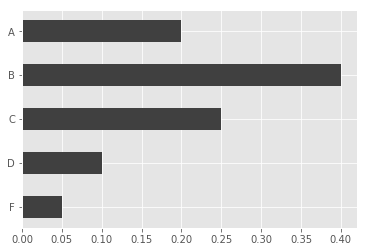

In [34]:
plt.barh(y=grades[::-1], width=props[::-1], height=0.5, color='0.25')
plt.savefig('grades.jpg', dpi=300)

## Next Time: Data Visualization in pandas and Seaborn